# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

In [244]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':[6,6]},font_scale=1.3)
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# EDA

In [245]:
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [246]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [247]:
df.nunique()

User_ID                       2656
Product_ID                    1797
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              20
Product_Category_2              17
Product_Category_3              15
Purchase                      3736
dtype: int64

In [248]:
for i in df.columns:
    print(df[i].value_counts())
    print()

1002063    12
1005795    12
1001980    11
1004344    11
1006036    10
           ..
1004980     1
1004385     1
1004138     1
1002648     1
1000837     1
Name: User_ID, Length: 2656, dtype: int64

P00265242    21
P00220442    16
P00114942    15
P00010742    15
P00148642    15
             ..
P00072342     1
P00037842     1
P00207042     1
P00129742     1
P00358242     1
Name: Product_ID, Length: 1797, dtype: int64

M    3765
F    1233
Name: Gender, dtype: int64

26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64

4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18
Name: Occupation, dtype: int64

B    2102
C    1555
A    1341
Name: City_Category, dtype: int64

1     1758
2      915
3      908
4+     742
0      675
Name: Stay_In_Current_City_Years, dtype: int64



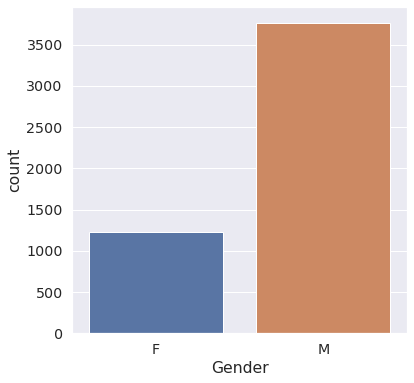

In [249]:
sns.countplot(df['Gender'])

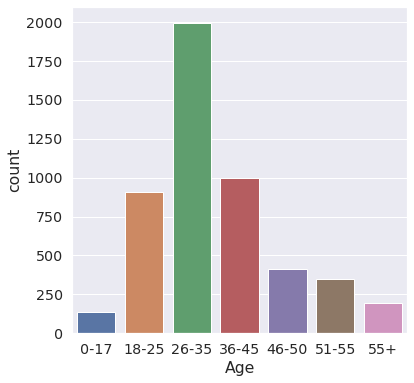

In [250]:
sns.countplot(df['Age'])

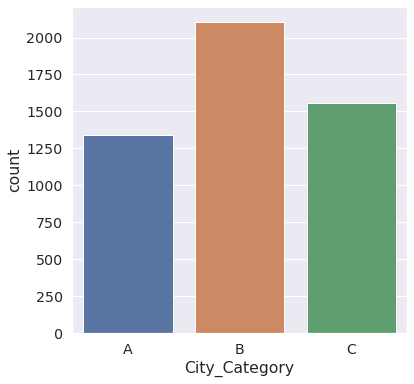

In [251]:
sns.countplot(df['City_Category'])

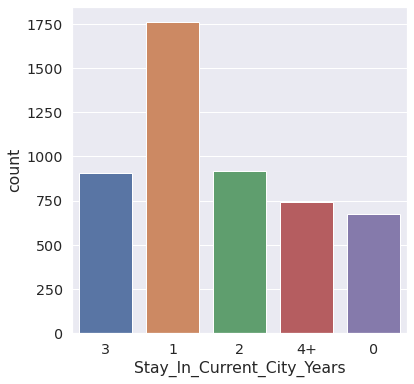

In [252]:
sns.countplot(df['Stay_In_Current_City_Years'])

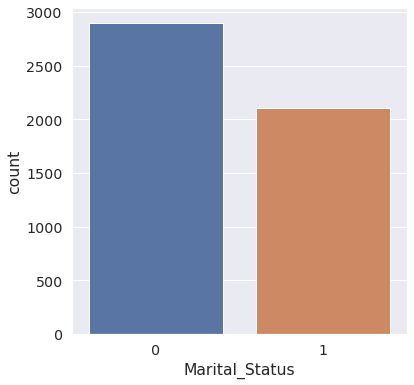

In [253]:
sns.countplot(df['Marital_Status'])

#Preprocessing

In [254]:
len(df)

4998

In [255]:
df.isnull().sum() 

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

Product_Category_2는 전체 대비 결측치가 너무 많아 열 전체 제거

In [256]:
df_2=df.drop(columns={'Product_Category_3'})
df_2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,NaN,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,NaN,1413


Product_Category_3 결측치는 Product ID 앞 네자리별 평균값으로 대체

In [257]:
p = []

for i in df.Product_ID.values:
    p.append(i[:4]) 

# p에서 고유값 추출
p_id= list(set(p))     
p_id

['P002', 'P001', 'P003', 'P009', 'P000']

In [258]:
p002 = [i for i, value in enumerate(p) if value == 'P002']
p001 = [i for i, value in enumerate(p) if value == 'P001']
p003 = [i for i, value in enumerate(p) if value == 'P003']
p009 = [i for i, value in enumerate(p) if value == 'P009']
p000 = [i for i, value in enumerate(p) if value == 'P000']

In [259]:
df_2.iloc[p002]=df_2.iloc[p002].fillna(df_2.Product_Category_2[p002].mean())
df_2.iloc[p001]=df_2.iloc[p001].fillna(df_2.Product_Category_2[p001].mean())
df_2.iloc[p003]=df_2.iloc[p003].fillna(df_2.Product_Category_2[p003].mean())
df_2.iloc[p009]=df_2.iloc[p009].fillna(df_2.Product_Category_2[p009].mean())
df_2.iloc[p000]=df_2.iloc[p000].fillna(df_2.Product_Category_2[p000].mean())
df_2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.00000,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,10.42757,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.00000,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.00000,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.00000,5780
...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.00000,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,10.42757,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.00000,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,10.42757,1413


In [260]:
df_2.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

범주형 변수들 원핫인코딩

In [261]:
categorical_data=df_2[['Stay_In_Current_City_Years','Gender','Age','Occupation', 'City_Category','Product_Category_1','Product_Category_2']]

In [262]:
# 원핫인코더 Fitting
ohe = OneHotEncoder(sparse=False)
encoding=ohe.fit(categorical_data)
encoding.get_feature_names(['Stay_In_Current_City_Years','Gender','Age','Occupation', 'City_Category','Product_Category_1','Product_Category_2'])

array(['Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Gender_F', 'Gender_M',
       'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6',
       'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1

In [263]:
dd_1=pd.DataFrame(encoding.transform(categorical_data), columns=encoding.get_feature_names(['Stay_In_Current_City_Years','Gender','Age','Occupation', 'City_Category','Product_Category_1','Product_Category_2']))
dd_1

,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Product_Category_2_10.0,Product_Category_2_10.427570093457945,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4994,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4995,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


수치형 변수는 표준화 Scaling

In [264]:
scaler = StandardScaler()
scaled=scaler.fit_transform(df[['Purchase']])
dd_2=pd.DataFrame(scaled, columns=['Purchase'])
dd_2

,Purchase
0,-1.445300
1,-0.950574
2,-0.307810
3,1.439236
4,-0.691107
...,...
4993,0.493395
4994,-1.438298
4995,-0.946172
4996,-1.564730


In [265]:
data=pd.concat([dd_2, dd_1, df[['Marital_Status']]],1)
data

,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Product_Category_2_10.427570093457945,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Marital_Status
0,-1.445300,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,-0.950574,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.307810,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.439236,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.691107,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.493395,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4994,-1.438298,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4995,-0.946172,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4996,-1.564730,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#KNN

In [266]:
X = data.drop(['Marital_Status'], axis = 1)
y = data.Marital_Status

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [268]:
print(X_train.shape)
print(X_test.shape)

(3498, 81)
(1500, 81)


In [269]:
knn = KNeighborsClassifier() # n_neighbors: default=5
knn.fit(X_train, y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.635


In [270]:
print(metrics.classification_report(y_test,knn.predict(X_test), digits=2))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70       873
           1       0.57      0.51      0.54       627

    accuracy                           0.63      1500
   macro avg       0.62      0.62      0.62      1500
weighted avg       0.63      0.63      0.63      1500



## Hyperparameter 조정

In [271]:
k_range = range(1, 21)

scores = []

# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

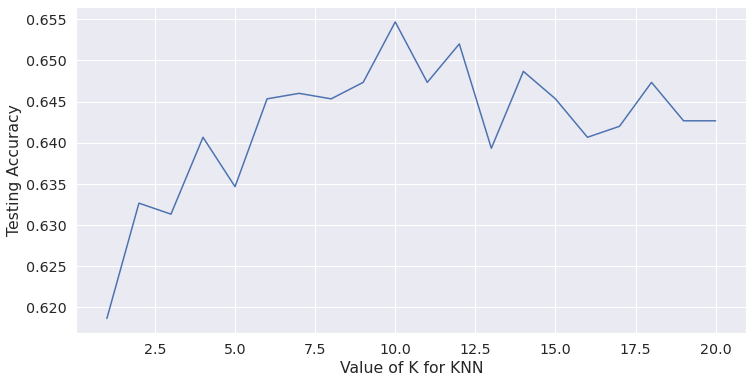

In [272]:
# plot the relationship between K and testing accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

K=10일때 Testing Accuracy 최대로 보임

In [277]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.655


In [278]:
print(metrics.classification_report(y_test,knn.predict(X_test), digits=2))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74       873
           1       0.64      0.41      0.50       627

    accuracy                           0.65      1500
   macro avg       0.65      0.62      0.62      1500
weighted avg       0.65      0.65      0.64      1500



0.635에서 0.655로 Test Score 증가

In [279]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.662


In [280]:
print(metrics.classification_report(y_test,knn.predict(X_test), digits=2))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       873
           1       0.61      0.53      0.57       627

    accuracy                           0.66      1500
   macro avg       0.65      0.64      0.65      1500
weighted avg       0.66      0.66      0.66      1500



거리 가중치를 사용하니 0.655에서 0.662로 Accuracy 더 증가